# Credit Scoring: Case Study

***Kredi skorlama ve segmentasyon, bireylerin veya işletmelerin kredi değerliliğinin değerlendirilmesi ve kredi profillerine göre farklı gruplara ayrılması sürecini ifade eder. Borçluların borçlarını geri ödeme olasılığını değerlendirmeyi amaçlar ve finans kuruluşlarının kredi verme ve kredi riskini yönetme konusunda bilinçli kararlar almasına yardımcı olur.***


<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzKB0N4TlZH-ooRz_br4JnfkXeFnYmjgsFketeQFr8ESqzTakiOEoNt0qWDu41grsMpyI&usqp=CAU'>


In [33]:
import pandas as pd    # datamız okuma ve incelem için 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
#from sklearn.preprocessing import StandardScaler  # verimizi standartize etmek için 

from sklearn.metrics import silhouette_score
# verilen küme sayısına göre çıkan skor arasındaki maksimum  değişimi bize olması gereken küme sayısını verir
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv("credit_scoring.csv")
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [35]:
df.info()  # Boş değerlerimiz yok 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


## meaning columns 
    Age: This feature represents the age of the individual.
    Gender: This feature captures the gender of the individual.
    
    Marital Status: This feature denotes the marital status of the individual.
    Education Level: This feature represents the highest level of education attained by the individual.
    
    Employment Status: This feature indicates the current employment status of the individual.
    
    Credit Utilization Ratio: This feature reflects the ratio of credit used by the individual compared to their total available credit limit.
    
    Payment History: It represents the monthly net payment behaviour of each customer, taking into account factors such as on-time payments, late payments, missed payments, and defaults.
    
    Number of Credit Accounts: It represents the count of active credit accounts the person holds.
    Loan Amount: It indicates the monetary value of the loan.
    
    Interest Rate: This feature represents the interest rate associated with the loan.
    Loan Term: This feature denotes the duration or term of the loan.
    Type of Loan: It includes categories like “Personal Loan,” “Auto Loan,” or potentially other types of loans.

# EDA

In [36]:
df['Type of Loan'].unique()
df['Type of Loan']=df['Type of Loan'].map({'Personal Loan':0,'Auto Loan':1, 'Home Loan':2})

In [37]:
df['Employment Status']=df['Employment Status'].map({'Employed':1, 'Unemployed':0, 'Self-Employed':1})

In [38]:
df['Education Level']=df['Education Level'].map({'Master':3, 'High School':1, 'PhD':2, 'Bachelor':0})

In [39]:
df['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [40]:
df['Marital Status']=df['Marital Status'].map({'Married':1,'Divorced':2 ,'Single':0})

In [41]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [42]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,1,1,3,1,0.22,2685.0,2,4675000,2.65,48,0
1,25,1,1,1,0,0.20,2371.0,9,3619000,5.19,60,1
2,30,0,0,3,1,0.22,2771.0,6,957000,2.76,12,1
3,58,0,1,2,0,0.12,1371.0,2,4731000,6.57,60,1
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,0


In [43]:
df.isna().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

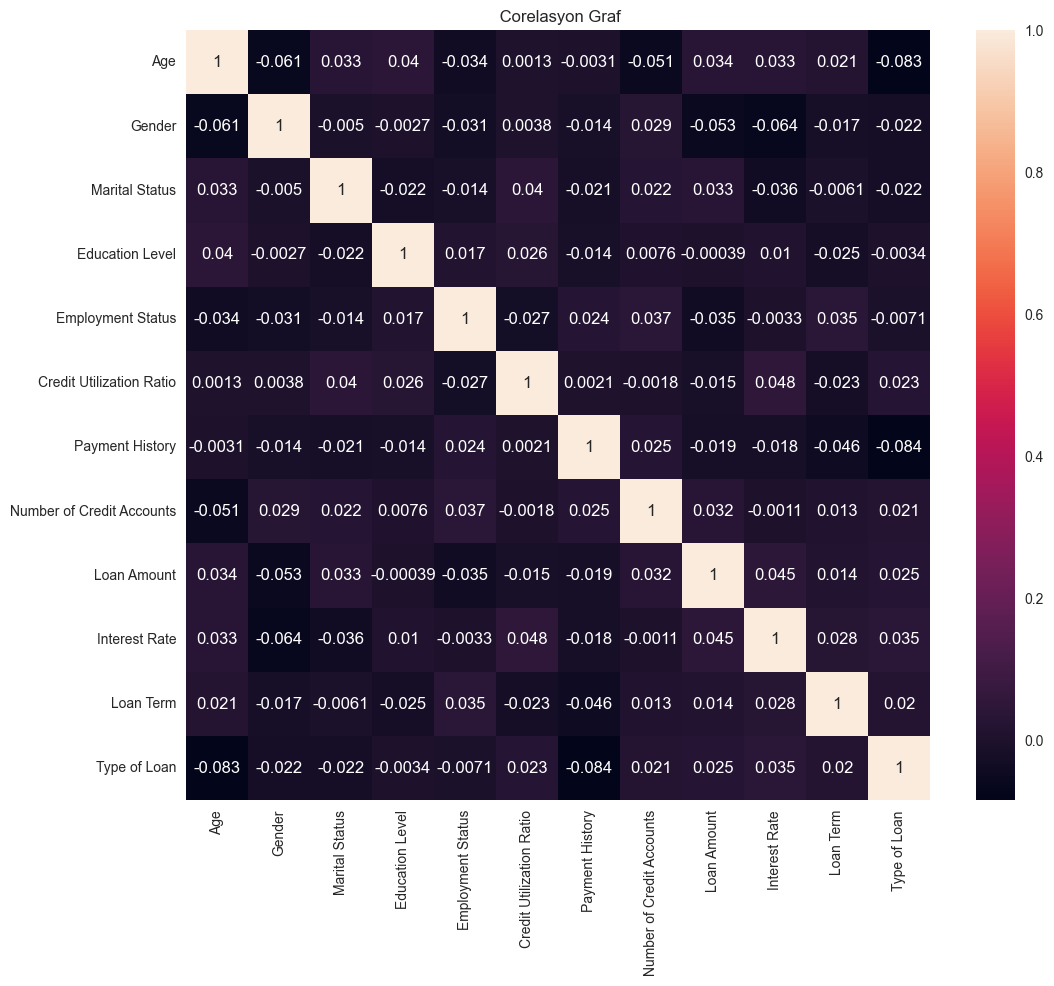

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title(' Corelasyon Graf');

In [45]:
#credit_scores = []
#
#for index, row in df.iterrows():
#    payment_history = row['Payment History']
#    credit_utilization_ratio = row['Credit Utilization Ratio']
#    number_of_credit_accounts = row['Number of Credit Accounts']
#    education_level = row['Education Level']
#    employment_status = row['Employment Status']
#
#    # Apply the FICO formula to calculate the credit score
#    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
#    credit_scores.append(credit_score)
#    
#    # Add the credit scores as a new column to the DataFrame
#df['Credit Score'] = credit_scores

def credi(row):
    return (row['Payment History'] * 0.35 +
            row['Credit Utilization Ratio'] * 0.30 +
            row['Number of Credit Accounts'] * 0.15 +
            row['Education Level'] * 0.10 +
            row['Employment Status'] * 0.10)

df['Credit Score'] = df.apply(credi, axis=1)

In [46]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,1,1,3,1,0.22,2685.0,2,4675000,2.65,48,0,940.516
1,25,1,1,1,0,0.20,2371.0,9,3619000,5.19,60,1,831.360
2,30,0,0,3,1,0.22,2771.0,6,957000,2.76,12,1,971.216
3,58,0,1,2,0,0.12,1371.0,2,4731000,6.57,60,1,480.386
4,32,1,1,0,1,0.99,828.0,2,3289000,6.28,36,0,290.497


In [47]:
df.shape

(1000, 13)

Text(0.5, 1.0, 'Number of Credit Accounts Dağılımı')

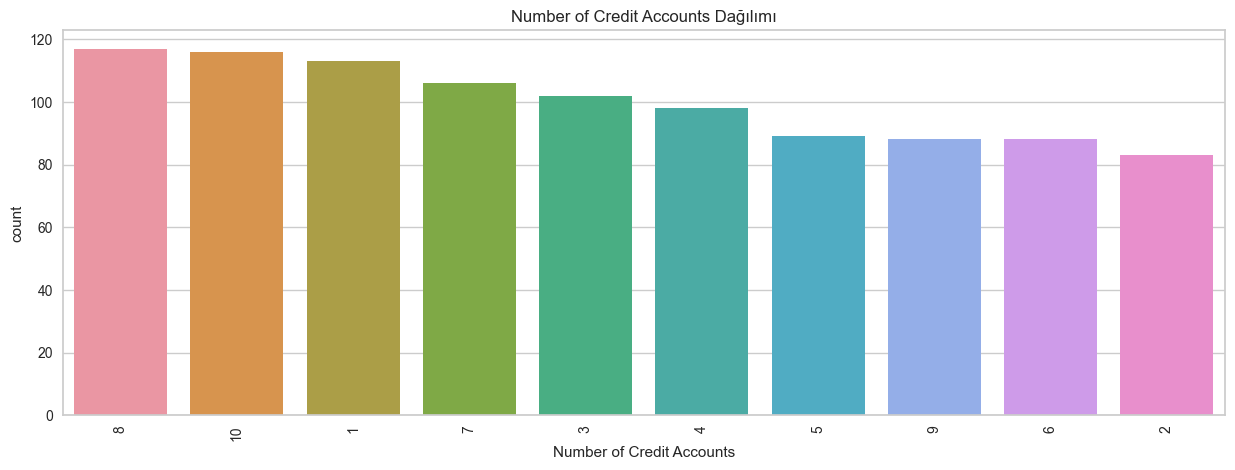

In [48]:
plt.figure(figsize=(15,5))
a=df['Number of Credit Accounts'].value_counts()
sns.countplot(x=df['Number of Credit Accounts'],order=a.index)
plt.xticks(rotation=90);
plt.title('Number of Credit Accounts Dağılımı')

# Modeling and clustering 

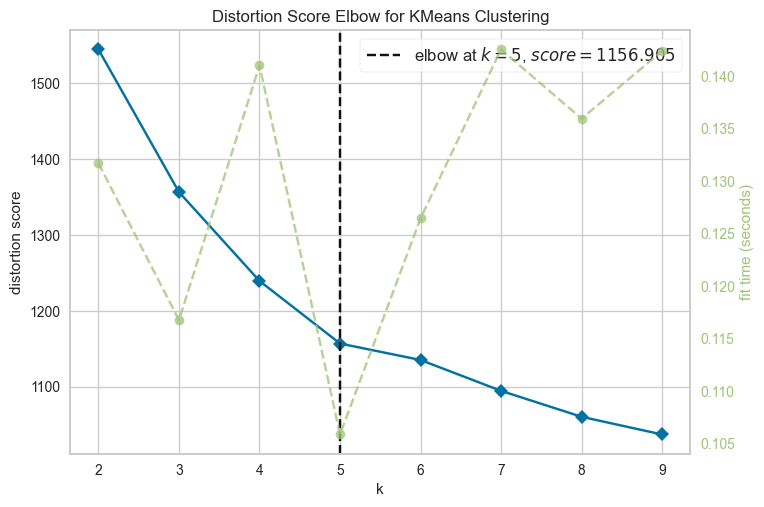

In [51]:
x=df

from sklearn.preprocessing import MinMaxScaler
x= MinMaxScaler().fit_transform(x)

km=KMeans(random_state=42)
elbov=KElbowVisualizer(km,k=(2,10))
elbov.fit(x);
elbov.show();

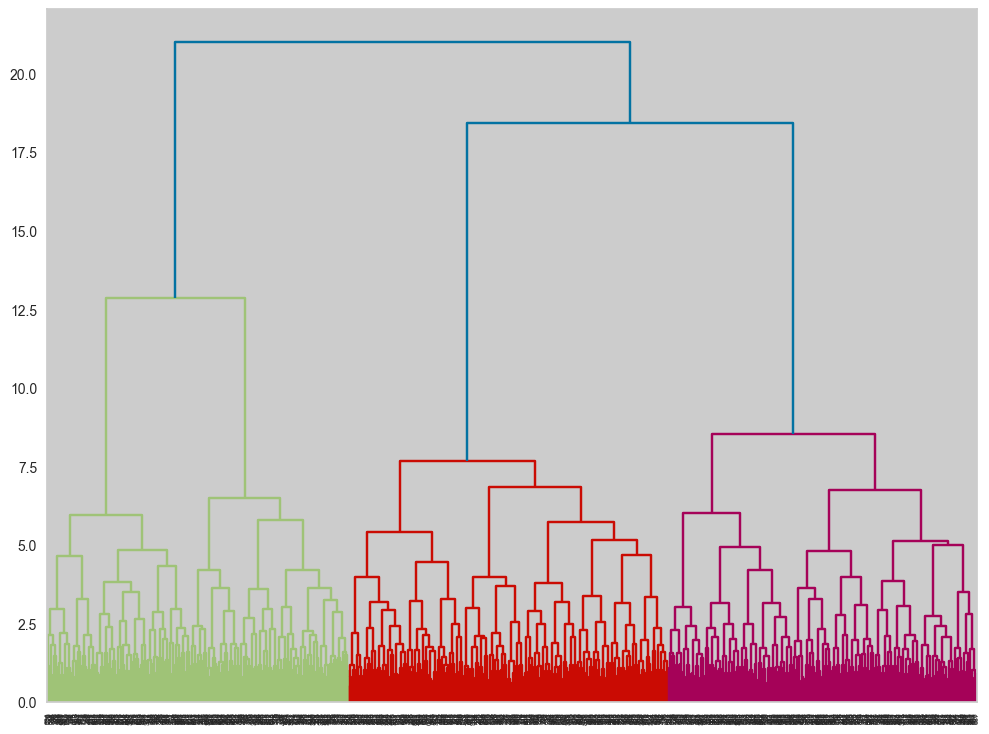

In [52]:
from scipy.cluster.hierarchy import dendrogram,linkage

data=linkage(x,method='ward',metric='euclidean')

plt.figure(figsize=(12,9))
dendrogram(data);

In [53]:
model = KMeans(n_clusters=5,random_state=42)

kume = model.fit_predict(x)
tahmin=model.predict(x)
tahmin

array([0, 3, 2, 4, 0, 3, 4, 1, 4, 3, 2, 3, 2, 0, 0, 3, 2, 2, 3, 2, 1, 2,
       3, 0, 4, 0, 3, 0, 2, 4, 1, 1, 2, 1, 1, 1, 1, 2, 2, 4, 0, 2, 2, 2,
       0, 3, 4, 1, 0, 2, 0, 3, 0, 3, 2, 4, 2, 4, 2, 2, 3, 2, 4, 0, 3, 4,
       1, 2, 2, 2, 2, 2, 2, 1, 4, 2, 2, 2, 4, 2, 2, 2, 4, 0, 0, 2, 2, 2,
       4, 3, 2, 2, 3, 4, 2, 2, 2, 0, 3, 1, 4, 2, 1, 4, 2, 3, 3, 1, 0, 4,
       4, 2, 4, 1, 4, 2, 3, 0, 0, 2, 1, 2, 3, 2, 4, 2, 2, 0, 3, 2, 2, 1,
       4, 2, 1, 3, 2, 0, 1, 3, 2, 1, 1, 2, 1, 3, 3, 2, 1, 0, 4, 2, 2, 1,
       0, 3, 2, 3, 1, 0, 2, 2, 1, 1, 0, 4, 2, 3, 1, 3, 4, 2, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 2, 3, 0, 1, 2, 3, 3, 2, 2, 3, 2, 4, 2, 1, 3,
       3, 2, 4, 2, 4, 0, 4, 2, 2, 0, 4, 0, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3,
       2, 3, 1, 2, 3, 2, 4, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 4, 2, 2, 4, 1,
       2, 4, 2, 0, 2, 2, 4, 0, 3, 0, 4, 0, 2, 3, 1, 3, 1, 3, 2, 1, 0, 3,
       2, 1, 1, 4, 0, 1, 2, 3, 0, 4, 1, 2, 0, 2, 0, 2, 4, 0, 1, 2, 2, 3,
       3, 4, 4, 2, 2, 4, 2, 2, 2, 1, 2, 0, 3, 2, 2,

In [54]:
df['class']=tahmin

In [55]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan', 'Credit Score', 'class'],
      dtype='object')

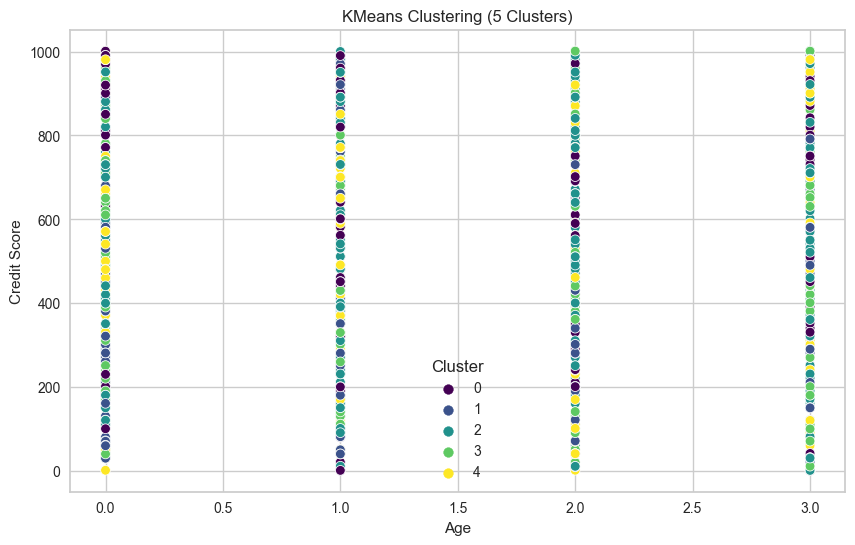

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Education Level'], y=df['Credit Score'], hue=df['class'], palette='viridis')
plt.title('KMeans Clustering (5 Clusters)')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.legend(title='Cluster')
plt.show()

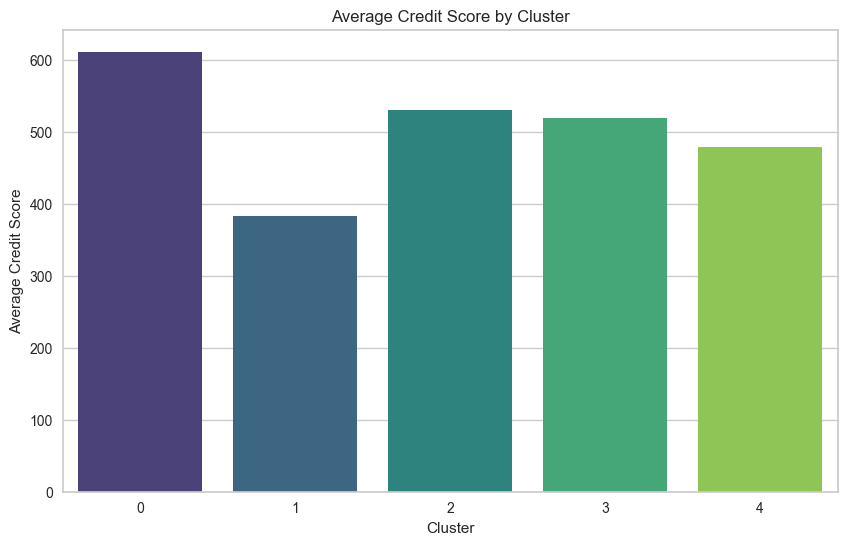

In [57]:
cluster_summary = df.groupby('class')['Credit Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='Credit Score', data=cluster_summary, palette='viridis')
plt.title('Average Credit Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Credit Score')
plt.show()

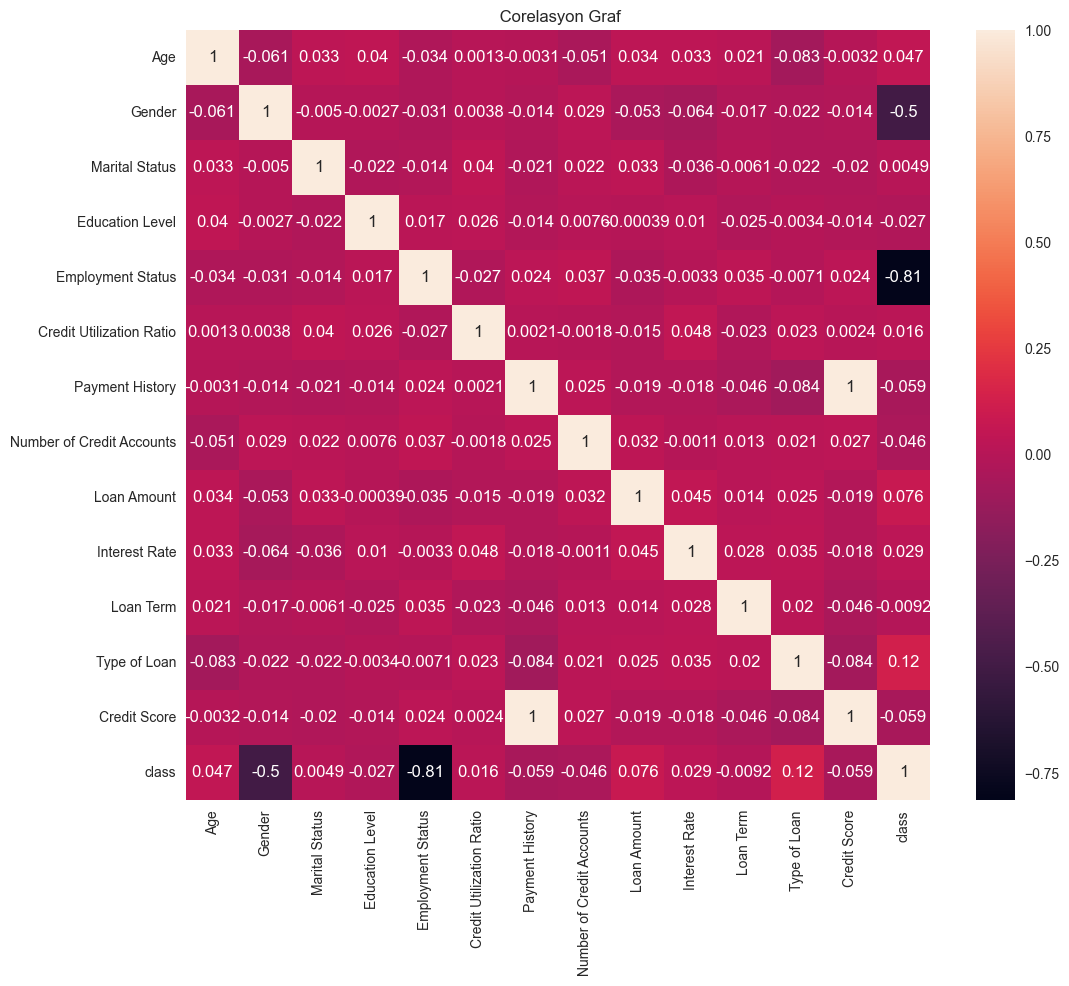

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title(' Corelasyon Graf');

In [59]:
from sklearn.cluster import KMeans

X = df[['Credit Score']]
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)
df['Segment'] = kmeans.labels_

In [60]:
df.head(3)

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,class,Segment
0,60,1,1,3,1,0.22,2685.0,2,4675000,2.65,48,0,940.516,0,0
1,25,1,1,1,0,0.20,2371.0,9,3619000,5.19,60,1,831.360,3,0
2,30,0,0,3,1,0.22,2771.0,6,957000,2.76,12,1,971.216,2,0


In [61]:
import plotly.express as px

df['Segment'] = df['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

#### Yaptığımız Segmentasyona göre Kredi verip vermiyeceğimizi anlayabiliyoruz .
